### **1. Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Import the dataset**

In [3]:
from google.colab import files
file = files.upload()

Saving Iris Data.csv to Iris Data.csv


In [4]:
data = pd.read_csv('Iris Data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **3. Data Exploration and Handling Null Values**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### **We can see that no null values are present**

### **4. Data Preprocessing**

#### **4.1 Handling Categorical Features**

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['species'] = lb.fit_transform(data['species'])

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **5. Split data into training and testing**

In [9]:
from sklearn.model_selection import train_test_split

y = data.pop('species')
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **6. Model Building**

Text(0, 0.5, 'Error Rate')

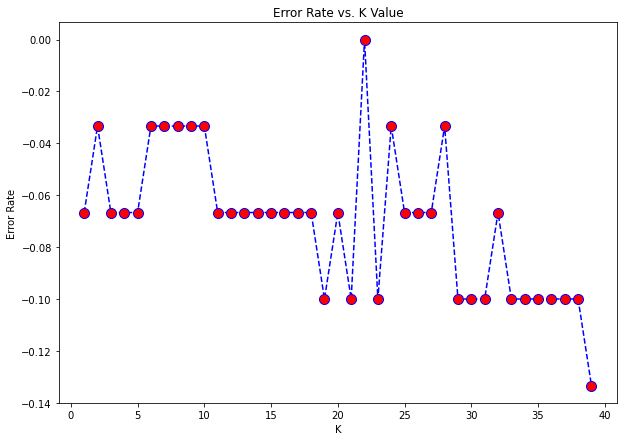

In [10]:
# Initialize the K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
error_rates = []

# Try checking the error rates for various values of k
for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    # error rate can be found 
    # by checking the difference between actual and predicted value
    error_rates.append(np.mean(y_test - preds))

# Plotting error rates for different values of k
plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
### Let's consider k=23 to create a final model
knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [12]:
# Check model efficiency
from sklearn.metrics import accuracy_score
y_predict = knn_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9

### **Conclusion -**
We can see here that the model gives the accuracy score i.e. equal to 90%